### Informações sobre atributos:
1) __id__: identificador único
2) __gênero__: "Masculino", "Feminino" ou "Outro"
3) __idade__: idade do paciente
4) __hipertensão__: 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão
5) __doença cardíaca__: 0 se o paciente não tiver doença cardíaca, 1 se o paciente tiver doença cardíaca
6) __já casado__: "Não" ou "Sim"
7) __tipo de trabalho__: "crianças"(`children`), "Funcionário público"(`Govt_jov`), "Nunca trabalhou"(`Never_worked`), "Privado"(`Private`) ou "Autônomo"(`Self-employed`)
8) __tipo de residência__: "Rural" ou "Urbana"
9) __nível médio de glicose__: nível médio de glicose no sangue
10) __IMC__: índice de massa corporal
11) __status de tabagismo__: "ex-fumante"(`formerly smoked`), "nunca fumou"(`formerly smoked`), "fuma"(`smokes`) ou "Desconhecido"(`Unknown`)
12) __AVC__: 1 se o paciente teve um AVC ou 0 se não teve

In [26]:
import copy 
import pandas as pd
import seaborn as sea 
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv(r'datasets/StrokePredictionDataset/healthcare-dataset-stroke-data.csv',sep=',')

In [28]:
data.head(4)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [29]:
data.loc[data.isna().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [30]:
data.dropna(inplace=True)

In [31]:
for coluna in data.columns:
    
    print(f'{coluna} length = ',len(data[coluna].value_counts().index))

id length =  4909
gender length =  3
age length =  104
hypertension length =  2
heart_disease length =  2
ever_married length =  2
work_type length =  5
Residence_type length =  2
avg_glucose_level length =  3852
bmi length =  418
smoking_status length =  4
stroke length =  2


,stroke,count
0,0,4700
1,1,209


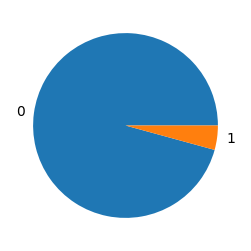

In [68]:
plt.figure(figsize=(4,3))
pizza = data['stroke'].value_counts().reset_index()
display(pizza)
plt.pie( x = pizza['count'] , labels = pizza['stroke'] )
plt.show()

> Irei precisar fazer um balanceamento de dados

&nbsp;

# Classificação

In [85]:
from sklearn.preprocessing   import StandardScaler,MinMaxScaler,LabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score,KFold
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import *

In [33]:
from sklearn.naive_bayes  import GaussianNB
from sklearn.tree         import DecisionTreeClassifier
from sklearn.svm          import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier

In [74]:
from imblearn.under_sampling import RandomUnderSampler

## Preprocessamento

#### Removendo atributos

In [34]:
data.drop(columns=['id'],inplace=True)

#### Conversão do tipo de atributo para numerico

In [35]:
classeGender = LabelBinarizer()
classeMaried = LabelBinarizer()

In [36]:
data['gender'] = classeGender.fit_transform(data['gender'])

In [37]:
data['ever_married'] = classeMaried.fit_transform(data['ever_married'])

In [38]:
data = pd.get_dummies(data,columns=['work_type','Residence_type','smoking_status'],dtype=int)

#### baleanceamento e definindo modelo

In [73]:
X = data.drop(columns=['stroke'])
Y = data['stroke']

In [75]:
under = RandomUnderSampler(sampling_strategy='majority',random_state=42)

In [76]:
xUnder, yUnder = under.fit_resample(X,Y)

In [78]:
xUnder.describe()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.588517,54.175311,0.184211,0.124402,0.758373,121.133206,29.519378,0.145933,0.004785,0.583732,0.196172,0.069378,0.485646,0.514354,0.220096,0.222488,0.389952,0.167464
std,0.492692,22.459544,0.388120,0.330435,0.428582,56.790911,7.327271,0.353462,0.069088,0.493530,0.397576,0.254400,0.500393,0.500393,0.414807,0.416416,0.488324,0.373837
min,0.000000,0.480000,0.000000,0.000000,0.000000,55.350000,14.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,0.000000,0.000000,1.000000,78.067500,24.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,58.000000,0.000000,0.000000,1.000000,97.970000,28.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,74.000000,0.000000,0.000000,1.000000,162.207500,32.900000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,271.740000,56.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
xtrain ,xtest ,ytrain ,ytest = train_test_split(xUnder.values,yUnder,test_size=0.25,random_state=42)

### Regressão Logistica

In [ ]:
logistic = LogisticRegression()